In [106]:
import pandas as pd
import numpy as np

In [107]:
df = pd.read_csv("preprocessed_df.csv", encoding = "ISO-8859-1")
df.head()

,article,summary,topic
0,"['musician', 'tackle', 'u', 'red', 'tape', 'mu...","['nigel', 'mccune', 'musician', 'union', 'said...",NaN
1,"['u2s', 'desire', 'number', 'one', 'u2', 'thre...","['still', 'want', 'morethey', 'want', 'biggest...",entertainment
2,"['rocker', 'doherty', 'onstage', 'fight', 'roc...","['babyshambles', 'formed', 'acrimonious', 'dep...",NaN
3,"['snicket', 'top', 'u', 'box', 'office', 'char...","['series', 'unfortunate', 'event', 'also', 'st...",NaN
4,"['ocean', 'twelve', 'raid', 'box', 'office', '...","['ocean', 'twelve', 'crime', 'caper', 'sequel'...",entertainment


In [108]:
# get the number of NaN values in the topic column
num_nan = df['topic'].isna().sum()

# calculate the percentage of NaN values
percentage_nan = (num_nan / len(df)) * 100
print(f"percentage_nan = {percentage_nan:.2f}%")

percentage_nan = 76.49%


In [109]:
print(df["topic"].value_counts())

business         125
sport            121
politics          96
tech              91
entertainment     90
Name: topic, dtype: int64


In [110]:
# REMOVE PUNCTUATION
import string

# TOKENIZATION
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize

# REMOVE STOP WORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# LEMMATIZATION
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

df["article"] = df["article"].astype(str)

def preprocess(text):
    text = str(text) #ensure that it's str like
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    tokenized_text = word_tokenize(punctuationfree)
    no_stop_words = [w for w in tokenized_text if not w in stop_words]
    lemmatized_text = [WordNetLemmatizer().lemmatize(w) for w in no_stop_words]

    return lemmatized_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leolamoureux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/leolamoureux/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
# DATAFRAME LABELISATION WITH KMEANS
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# remove rows with missing topic
df = df[df['topic'].notna()]

# vectorize the articles
vectorizer = TfidfVectorizer()
articles_vectors = vectorizer.fit_transform(df['article'])

# perform k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(articles_vectors)

# find the most common topic for each cluster
cluster_topics = []
for i in range(5):
    topics = df[kmeans.labels_ == i]['topic']
    most_common_topic = Counter(topics).most_common(1)[0][0]
    cluster_topics.append(most_common_topic)

# label the missing topics with the label of the cluster
df['cluster_label'] = kmeans.predict(articles_vectors)
df['cluster_topic'] = df['cluster_label'].apply(lambda x: cluster_topics[x])
df.loc[df['topic'].isna(), 'topic'] = df['cluster_topic']

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [112]:
# get the number of NaN values in the topic column
num_nan = df['topic'].isna().sum()

# calculate the percentage of NaN values
percentage_nan = (num_nan / len(df)) * 100
print(f"percentage_nan = {percentage_nan:.2f}%")

percentage_nan = 0.00%


In [113]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# load the training and test data into dataframes
# extract the feature and target columns

X = df["article"]
y = df["topic"]

# split the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer

# convert the "article" column into a bag of words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# initialize the classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# train the classifiers on the training data
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = logistic_regression.predict(X_test)
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# evaluate the classifiers' performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

     business       0.91      1.00      0.95        21
entertainment       1.00      0.96      0.98        27
     politics       1.00      0.94      0.97        17
        sport       0.95      1.00      0.98        21
         tech       1.00      0.95      0.97        19

     accuracy                           0.97       105
    macro avg       0.97      0.97      0.97       105
 weighted avg       0.97      0.97      0.97       105

Decision Tree:
               precision    recall  f1-score   support

     business       0.69      0.86      0.77        21
entertainment       0.95      0.78      0.86        27
     politics       0.60      0.71      0.65        17
        sport       0.86      0.86      0.86        21
         tech       0.81      0.68      0.74        19

     accuracy                           0.78       105
    macro avg       0.78      0.78      0.77       105
 weighted avg       0.80

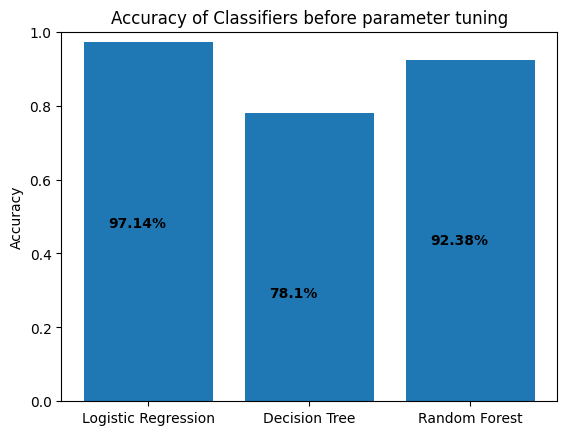

In [114]:
import matplotlib.pyplot as plt

classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.bar(classifiers, scores)
plt.ylabel('Accuracy')
plt.title("Accuracy of Classifiers before parameter tuning")
plt.ylim(0,1) # set the y-axis limit to (0,1)

# Add the accuracy percent as text on top of each bar
for i, v in enumerate(scores):
    plt.text(i-.25, v-.5, str(round(v*100,2))+"%", color='black', fontweight='bold')

plt.show()

In [115]:
from sklearn.model_selection import GridSearchCV

# initialize the classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# define the parameters to tune
param_grid_lr = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
param_grid_dt = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15, 20]}

# tune the parameters with GridSearchCV
grid_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)
grid_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5)
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# train the classifiers on the training data
grid_lr.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

# make predictions on the test data
y_pred_lr = grid_lr.predict(X_test)
y_pred_dt = grid_dt.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

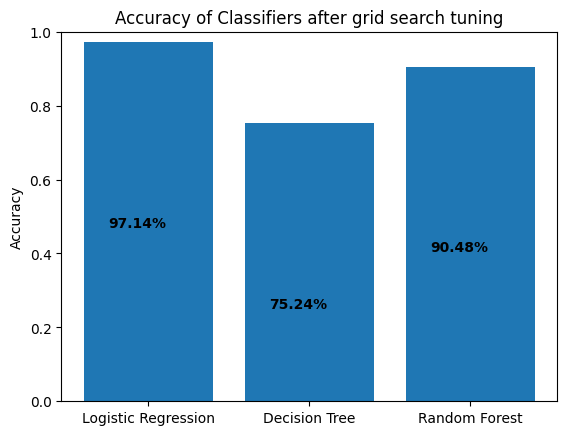

In [116]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.bar(classifiers, scores)
plt.ylabel('Accuracy')
plt.title("Accuracy of Classifiers after grid search tuning")
plt.ylim(0,1) # set the y-axis limit to (0,1)

# Add the accuracy percent as text on top of each bar
for i, v in enumerate(scores):
    plt.text(i-.25, v-.5, str(round(v*100,2))+"%", color='black', fontweight='bold')

plt.show()

In [117]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


# load the training and test data into dataframes
# extract the feature and target columns
X = df["article"]
y = df["topic"]

# split the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer

# convert the "article" column into a bag of words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# initialize the classifiers
naive_bayes = MultinomialNB()
svm = SVC()


# train the classifiers on the training data
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)


# make predictions on the test data
y_pred_nb = naive_bayes.predict(X_test)
y_pred_svm = svm.predict(X_test)


# evaluate the classifiers' performance
print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("SVM:")
print(classification_report(y_test, y_pred_svm))


Naive Bayes:
               precision    recall  f1-score   support

     business       0.91      1.00      0.95        21
entertainment       1.00      0.93      0.96        27
     politics       0.94      0.94      0.94        17
        sport       0.95      0.95      0.95        21
         tech       0.95      0.95      0.95        19

     accuracy                           0.95       105
    macro avg       0.95      0.95      0.95       105
 weighted avg       0.95      0.95      0.95       105

SVM:
               precision    recall  f1-score   support

     business       0.75      1.00      0.86        21
entertainment       0.90      0.67      0.77        27
     politics       1.00      0.71      0.83        17
        sport       0.77      0.95      0.85        21
         tech       0.79      0.79      0.79        19

     accuracy                           0.82       105
    macro avg       0.84      0.82      0.82       105
 weighted avg       0.84      0.82      0.

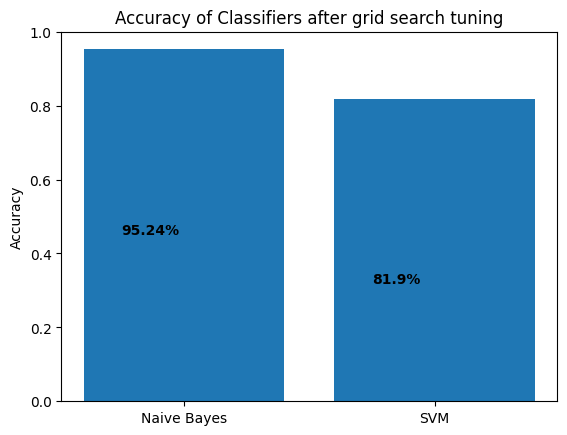

In [118]:
classifiers = ['Naive Bayes', 'SVM']
scores = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]

plt.bar(classifiers, scores)
plt.ylabel('Accuracy')
plt.title("Accuracy of Classifiers after grid search tuning")
plt.ylim(0,1) # set the y-axis limit to (0,1)

# Add the accuracy percent as text on top of each bar
for i, v in enumerate(scores):
    plt.text(i-.25, v-.5, str(round(v*100,2))+"%", color='black', fontweight='bold')

plt.show()